In [ ]:
#analise de dados utilizando PCA 
#https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
#http://pbpython.com/categorical-encoding.html
#https://pypi.python.org/pypi/MDP/2.3

#python for datascience
#http://hamelg.blogspot.com.br/
#http://hamelg.blogspot.com.br/search/label/Python%20for%20data%20analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import scipy.stats as stats
import prince

In [33]:
#dados = pd.read_csv('dadoslimpos.csv')
dados = pd.read_json('dadoslimpos.json')

#notas em conceitos
bins = [0, 45, 49, 69, 89, 100]
group_names = ['F', 'D', 'C', 'B', 'A']
dados['nota_conceito'] = pd.cut(dados['media_final'], bins, labels=group_names, include_lowest=True)
dados

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

#removendo coluna acrescentada devido ao csv
#dados.drop('Unnamed: 0', axis=1, inplace=True)
dados.shape

#print(dados.isnull().any())
#print(dados[dados.local_acesso_internet.isnull()][['aluno_id','local_acesso_internet', 'nome_escola_ensino_fundamental', 'nome_escola_ensino_medio']])


(34799, 44)

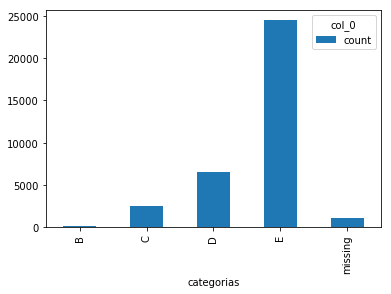

In [58]:
#http://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
my_tab = pd.crosstab(index = dados["categorias"],  # Make a crosstab
                              columns="count")      # Name the count column

#gerando graficos
%matplotlib inline

my_tab.plot.bar()

In [59]:
my_tab/my_tab.sum()

col_0,count
categorias,
B,0.003448
C,0.072301
D,0.188712
E,0.703354
missing,0.032185


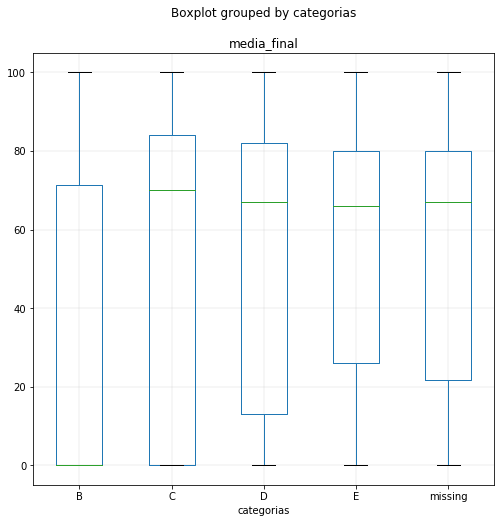

In [60]:
%matplotlib inline
#numerico x categorico
dados.boxplot(column="media_final",        # Column to plot
                 by= "categorias",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [61]:
#categorico x categorico
grouped = dados.groupby(['categorias','descricao'])
grouped.size()

categorias  descricao                                                                                          
B           Licenciatura em Espanhol [2012] - Campus Natal-Central                                                     6
            Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus EaD (ETEC)          85
            Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central       29
C           Licenciatura em Espanhol [2006-2011] - Campus Natal-Central                                               45
            Licenciatura em Espanhol [2012] - Campus Natal-Central                                                   238
            Licenciatura em Letras Espanhol EaD - Campus EaD                                                         338
            Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus EaD (ETEC)        1391
            Técnico de Nível Médio em Seg

In [62]:
table = pd.crosstab(index = dados["categorias"], 
                          columns = dados["descricao"])

table

descricao,Licenciatura em Espanhol [2006-2011] - Campus Natal-Central,Licenciatura em Espanhol [2012] - Campus Natal-Central,Licenciatura em Letras Espanhol EaD - Campus EaD,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus EaD (ETEC)","Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central"
categorias,,,,,
B,0,6,0,85,29
C,45,238,338,1391,504
D,42,291,926,3967,1341
E,164,1901,3975,14973,3463
missing,0,91,178,577,274


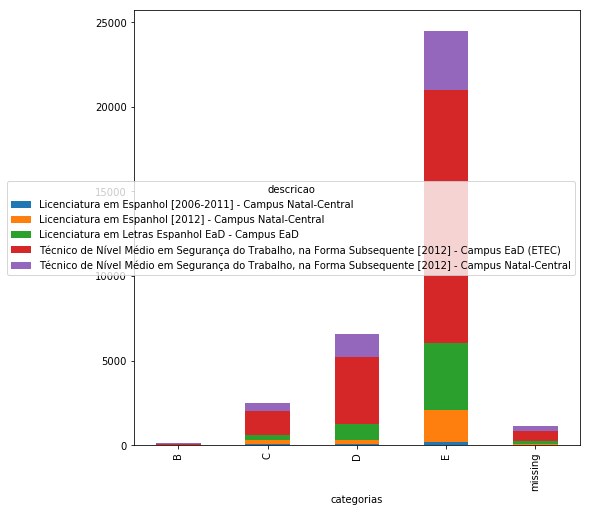

In [63]:
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [52]:
#table
#dados.loc[:, 'descricao_historico':'descricao_companhia_domiciliar']
#dados.loc[:, 'descricao_historico':]

In [28]:
#notas em conceitos
bins = [0, 45, 49, 69, 89, 100]
group_names = ['F', 'D', 'C', 'B', 'A']
dados['nota_conceito'] = pd.cut(dados['media_final'], bins, labels=group_names, include_lowest=True)
dados



,aluno_exclusivo_rede_publica,aluno_id,ano_letivo__ano,ano_letivo__ano_aluno,categorias,cep,ch_hora_relogio,codigo_censup,codigo_siape,descricao,descricao_afastamento,descricao_area_residencial,descricao_companhia_domiciliar,descricao_estado_civil,descricao_historico,descricao_imovel,descricao_internet,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_saude,descricao_situacao_matricula,descricao_trabalho,descricao_trabalho_responsavel,ensino_fundamental_conclusao,ficou_tempo_sem_estudar,inativo_siape,local_acesso_internet,media_final,nome_escola_ensino_fundamental,nome_escola_ensino_medio,percentual_frequencia,periodo_letivo,pessoa_fisica__nascimento_data,possui_necessidade_especial,qnt_pc,qtd_filhos,qtd_pessoas_domicilio,quantidade_smartphones,renda_bruta_familiar,tempo_sem_estudar,nota_conceito
0,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Introdução ao Direito(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,2000,1,False,missing,85,Colégio Salesiano São José,Colégio Salesiano São José,100,1,17/06/1986,True,1,1,1,1,1911.3,-1,B
1,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Introdução à Segurança do Trabalho(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,2000,1,False,missing,80,Colégio Salesiano São José,Colégio Salesiano São José,90,1,17/06/1986,True,1,1,1,0,1911.3,-1,B
10,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Gestão de Saúde e Segurança Ocupacional(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,2000,1,False,missing,100,Colégio Salesiano São José,Colégio Salesiano São José,95,2,17/06/1986,True,1,1,1,0,1911.3,-1,A
100,False,380893120557,2014,2013,D,59650-000,60,2,6,Técnico de Nível Médio em Segurança do Trabalh...,Necessidade de trabalhar para ajudar no susten...,Urbana,Pais,Solteiro(a),Língua Portuguesa,Financiado,Diariamente,Ensino fundamental incompleto,Ensino fundamental incompleto,Preta,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,0,1,False,De casa.,78,missing,Escola Estadual Juscelino Kubitscheck,100,1,19/08/1985,False,2,1,4,0,1950.0,3,B
1000,False,463374429513,2015,2015,E,59290-000,60,1,1,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Cônjuge,Casado(a),Psicologia do Trabalho(60H),Próprio,Diariamente,Ensino médio completo,Ensino médio completo,Branca,Ensino médio completo,O próprio aluno,Sistema Único de Saúde - SUS,Jubilado,Serviço público,Serviço público,1983,0,False,Em casa,0,Escola Municipal joão XXIII,"E,E Prof º. Francisco Ivo Cavalcanti",90,2,07/03/1966,False,3,2,5,2,1700.0,-1,F
10000,False,471183987245,2016,2015,E,59650-000,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,Nunca parou de estudar,Urbana,Cônjuge,Casado(a),Língua Portuguesa,Próprio,Diariamente,Ensino médio incompleto,Ensino fundamental completo,Não declarado,Ensino médio completo,Cônjuge,missing,Jubilado,Não está trabalhando,Não informado,0,1,False,CELULAR,0,missing,INSTITUTO PADRE IBIAPINA,100,1,16/09/1987,True,0,1,3,1,724.0,0,F
10001,False,471183987245,2016,2015,E,59650-000,30,0,9,Técnico de Nível Médio em Segurança do Trabalh...,Nunca parou de estudar,Urbana,Cônjuge,Casado(a),Estatística Aplicada à Segurança do Trabalho(30H),Próprio,Diariamente,Ensino médio incompleto,Ensino fundamental completo,Não declarado,Ensino médio completo,Côn

In [4]:
#print(dados[dados.nota_conceito.isnull()][['aluno_id','nota_conceito', 'media_final']])
print(dados.isnull().any())

aluno_exclusivo_rede_publica          False
aluno_id                              False
ano_letivo__ano                       False
ano_letivo__ano_aluno                 False
categorias                            False
cep                                   False
ch_hora_relogio                       False
codigo_censup                         False
codigo_siape                          False
descricao                             False
descricao_afastamento                 False
descricao_area_residencial            False
descricao_companhia_domiciliar        False
descricao_estado_civil                False
descricao_historico                   False
descricao_imovel                      False
descricao_internet                    False
descricao_mae_escolaridade            False
descricao_pai_escolaridade            False
descricao_raca                        False
descricao_responsavel_escolaridade    False
descricao_responsavel_financeiro      False
descricao_saude                 

nota_conceito     F    D     C     B     A
categorias                                
B                68    0    19    25     8
C               813   11   423   849   420
D              2102   52  1333  2159   921
E              7349  318  5886  7909  3014
missing         342   14   266   347   151
nota_conceito         F         D         C         B         A
categorias                                                     
B              0.006371  0.000000  0.002397  0.002215  0.001772
C              0.076166  0.027848  0.053362  0.075206  0.093044
D              0.196927  0.131646  0.168159  0.191248  0.204032
E              0.688495  0.805063  0.742526  0.700593  0.667700
missing        0.032040  0.035443  0.033556  0.030738  0.033451


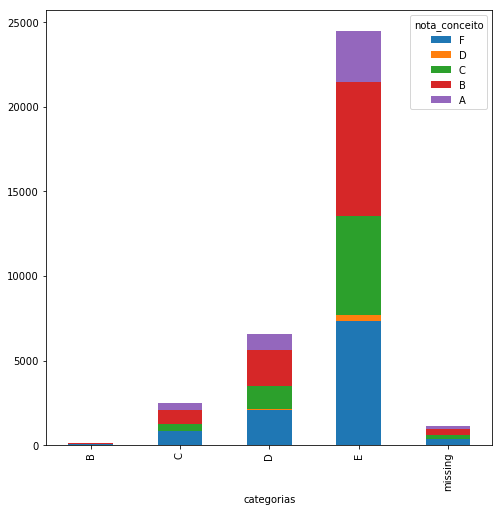

In [71]:
table = pd.crosstab(index = dados["categorias"], 
                          columns = dados["nota_conceito"])

print(table)
print(table/table.sum())

table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

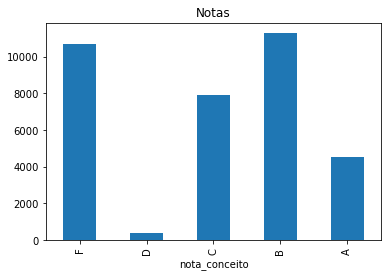

In [73]:
dados.groupby('nota_conceito').size().plot(kind='bar', title="Notas")
#hipotese: não é reprovação, mas sim desistencia

In [74]:
#teste chi-squared para goodness-of-fit 
#http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-25-chi.html

tb1  = pd.crosstab(index = dados["categorias"], columns = "count")
tb2 = pd.crosstab(index = dados["nota_conceito"], columns = "count")

observed = tb2
tb1_ratios = tb1/tb1.sum()  # Get population ratios
expected = tb1_ratios * tb2.sum()   # Get expected counts
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)


stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

col_0
count    1.056993e+06
dtype: float64
Critical value
9.48772903678
P value
[ 0.]


Power_divergenceResult(statistic=array([ 947683.79120538]), pvalue=array([ 0.]))

In [75]:
#https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test
#http://analise-estatistica.pt/inicio/2015/12/teste-do-qui-quadrado-para-analise-da-associacao-estatistica-entre-variaveis-categoricas.html
"""
Se o valor de p obtido for igual ou superior a 0,05 (p≥0,05) considera-se que as diferenças entre os valores 
observados e os valores esperados não são significativas e, portanto, as variáveis não apresentam uma 
associação estatística significativa. A análise dos valores dos resíduos ajustados permitirá dizer em que 
categorias as variáveis apresentam associação estatística (ainda que esta não seja significativa).

O teste do Qui-quadrado pressupõe, no entanto, que nenhuma célula da tabela tenha frequência esperada 
inferior a 1 e que não mais de 20% das células tenham frequência esperada inferior a 5 unidades. 
Uma vez que, no caso de estudo a dispersão de resultados propiciou tal situação, 
recorreu-se ao Teste Exato de Fisher cuja hipótese nula é a mesma do teste do Qui-quadrado (Pestana & Gageiro, 2008, p. 131).
"""

#teste de independência
observed = pd.crosstab(dados["categorias"], dados["nota_conceito"])
res = stats.chi2_contingency(observed=observed)
print(res)
if res[1] > 0.05:
    print("independencia")
else:
    print("dependencia")
    
observed


(190.17599766633433, 7.6047129299733851e-32, 16, array([[  3.68079543e+01,   1.36210811e+00,   2.73352683e+01,
          3.89287048e+01,   1.55659645e+01],
       [  7.71740107e+02,   2.85588666e+01,   5.73129458e+02,
          8.16205178e+02,   3.26366390e+02],
       [  2.01431530e+03,   7.45413661e+01,   1.49592256e+03,
          2.13037337e+03,   8.51847409e+02],
       [  7.50759574e+03,   2.77824650e+02,   5.57548355e+03,
          7.94015817e+03,   3.17493790e+03],
       [  3.43540906e+02,   1.27130090e+01,   2.55129170e+02,
          3.63334579e+02,   1.45282336e+02]]))
dependencia


nota_conceito,F,D,C,B,A
categorias,,,,,
B,68,0,19,25,8
C,813,11,423,849,420
D,2102,52,1333,2159,921
E,7349,318,5886,7909,3014
missing,342,14,266,347,151


In [76]:
#teste de independência
observed = pd.crosstab(dados["descricao_companhia_domiciliar"], dados["descricao_imovel"])
res = stats.chi2_contingency( observed=observed )
print(res[1])
if res[1] > 0.05:
    print("independencia")
else:
    print("dependencia")

observed

0.0
dependencia


descricao_imovel,Alugado,Cedido ou Emprestado,Financiado,Não informado,Outro,Pensionato ou Alojamento,Próprio
descricao_companhia_domiciliar,,,,,,,
Cônjuge,1982,1024,2018,99,203,0,3866
Mãe,609,215,100,63,53,0,2785
Não informado,41,58,57,0,29,0,31
Outros,649,582,291,0,117,0,952
Pai,122,46,22,0,0,0,489
Pais,1032,499,728,38,211,0,11226
Parente(s) ou amigo(s),813,352,176,22,97,0,1773
Sozinho(a),468,167,95,30,0,20,549


In [15]:
dados

,aluno_id,qtd_filhos,media_final,percentual_frequencia,ch_hora_relogio,ano_letivo__ano,periodo_letivo,ensino_fundamental_conclusao,ano_letivo__ano_aluno,qtd_pessoas_domicilio,qnt_pc,quantidade_smartphones,renda_bruta_familiar,tempo_sem_estudar,descricao_historico,aluno_exclusivo_rede_publica,descricao_companhia_domiciliar,ficou_tempo_sem_estudar,descricao_internet,local_acesso_internet,descricao_mae_escolaridade,nome_escola_ensino_fundamental,nome_escola_ensino_medio,descricao_pai_escolaridade,possui_necessidade_especial,descricao_afastamento,descricao_trabalho_responsavel,descricao_responsavel_financeiro,descricao_responsavel_escolaridade,descricao_area_residencial,descricao_imovel,descricao_saude,descricao_trabalho,cep,pessoa_fisica__nascimento_data,descricao,codigo_censup,codigo_siape,descricao_raca,inativo_siape,descricao_estado_civil,descricao_situacao_matricula,categorias,nota_conceito
0,471409825937,1.0,85,100.0,60,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Introdução ao Direito(60H),True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D,B
1,471409825937,1.0,80,90.0,60,2016,1,2000,2015,1,1.0,0.0,1911.3,-1.0,Introdução à Segurança do Trabalho(60H),True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D,B
2,471409825937,1.0,83,100.0,60,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Desenvolvimento de Projeto Integrador,True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D,B
3,471409825937,1.0,90,85.0,30,2016,1,2000,2015,1,1.0,0.0,1911.3,-1.0,"Filosofia, Ciência e Tecnologia",True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D,A
4,471409825937,1.0,67,100.0,30,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Sociologia do Trabalho,True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D,C
5,471409825937,1.0,85,100.0,30,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Seminário de Iniciação à Pesquisa(30H),True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D,B
6,471409825937,1.0,74,93.0,60,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Primeiros Socorros(60H),True,Sozinho(a),1.0,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O

In [88]:
#utilizando PRINCE
#dados_categoricos = dados.loc[:, 'descricao_historico':]
dados_categoricos = pd.crosstab(dados["categorias"], dados["nota_conceito"])
print(dados_categoricos)

#print(dados_categoricos.shape)
#dados_categoricos.dropna(inplace=True)
#print(dados_categoricos.shape)

#dados_categoricos.index = dados['aluno_id']
#dados_categoricos
ca = prince.CA(dados_categoricos, n_components=-1)

nota_conceito     F    D     C     B     A
categorias                                
B                68    0    19    25     8
C               813   11   423   849   420
D              2102   52  1333  2159   921
E              7349  318  5886  7909  3014
missing         342   14   266   347   151


(<matplotlib.figure.Figure at 0x259d1858208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x259d187fe10>)

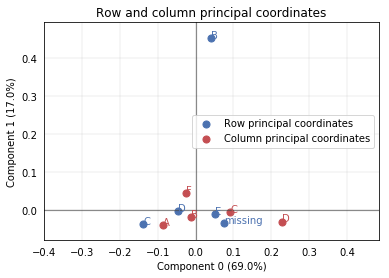

In [87]:
#gerando graficos
%matplotlib inline

ca.plot_rows_columns(show_row_labels=True, show_column_labels=True)

(<matplotlib.figure.Figure at 0x259d1808a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x259d1815400>)

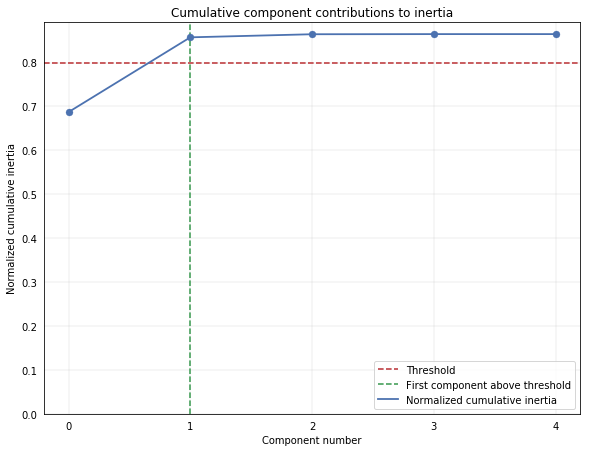

In [89]:
ca.plot_cumulative_inertia(threshold=0.8)

In [72]:
#variaveis que deu problema #'possui_necessidade_especial', 'tempo_sem_estudar',
df = dados[['aluno_exclusivo_rede_publica', 'categorias', 'cep', 
       'descricao', 'descricao_afastamento',
            'descricao_area_residencial', 'descricao_companhia_domiciliar',
       'descricao_estado_civil', 'descricao_historico', 'descricao_imovel',
       'descricao_internet', 'descricao_mae_escolaridade',
       'descricao_pai_escolaridade', 'descricao_raca',
       'descricao_responsavel_escolaridade',
       'descricao_responsavel_financeiro', 'descricao_saude',
       'descricao_situacao_matricula', 'descricao_trabalho',
       'descricao_trabalho_responsavel', 'ensino_fundamental_conclusao',
       'ficou_tempo_sem_estudar', 'local_acesso_internet',
        'nome_escola_ensino_fundamental',
         'nome_escola_ensino_medio', 
       'pessoa_fisica__nascimento_data', 
       'qnt_pc', 'qtd_filhos', 'qtd_pessoas_domicilio',
       'quantidade_smartphones', 'nota_conceito'  
       ]]
#print(df.isnull().any())
#df = dados.loc[:, 'descricao_historico':]

for index1, group1 in df.groupby(['descricao']):   
    #dftmp = df[df.descricao == index1][["categorias", "nota_conceito", "descricao_historico"]]
    #print(dftmp.isnull().any())
    dftmp = df[df.descricao == index1]
    
    #print(dftmp)
    
    mca = prince.MCA(dftmp, n_components=-1)
    #mca.plot_rows(show_points=True, show_labels=False, color_by='nota_conceito', ellipse_fill=True)
    break

#print(dados.columns)

C:\Users\Thiago\Anaconda3\lib\site-packages\prince\mca.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.drop(supplementary_row_names, axis=0, inplace=True)
C:\Users\Thiago\Anaconda3\lib\site-packages\prince\mca.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.drop(supplementary_column_names, axis=1, inplace=True)


C:\Users\Thiago\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Thiago\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\Thiago\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


ValueError: array must not contain infs or NaNs

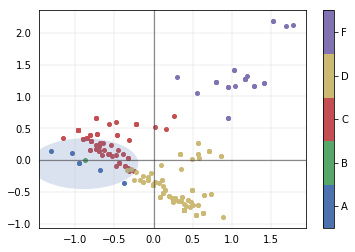

In [45]:
mca.plot_rows(show_points=True, show_labels=False, color_by='nota_conceito', ellipse_fill=True)

AttributeError: 'ListedColormap' object has no attribute 'from_list'

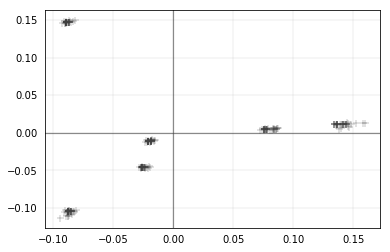

In [73]:
%matplotlib inline
mca.plot_rows_columns()

(<matplotlib.figure.Figure at 0x1c89c4dae48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c89c4d6748>)

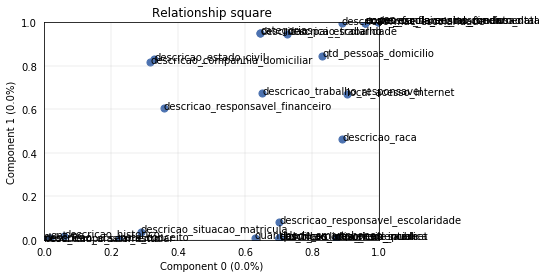

In [74]:
mca.plot_relationship_square()

(<matplotlib.figure.Figure at 0x1c89c4f50b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c89c2442e8>)

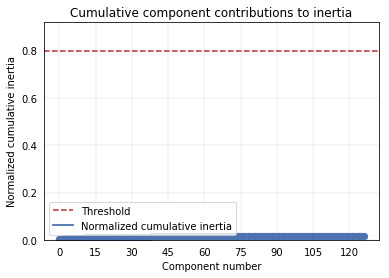

In [75]:
mca.plot_cumulative_inertia(threshold=0.8)

In [84]:
#df
import mca as mca2
#df2 = df["categorias", "nota_conceito", "descricao_historico"]

In [96]:
for index1, group1 in df.groupby(['descricao']):   
    dftmp = df[df.descricao == index1][["categorias", "nota_conceito", "descricao_historico"]]
    
    mca_ben = mca2.mca(dftmp)
    break

TypeError: Could not operate 'DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEECBBBBCCBACCAACABBBBBBCCBBCBBCCCBBBBBBBBBFCAABABBBBBBCCBBCBBABBABACCACACBCBABBBBBBCBCBBBCCCCBCBBBBBBACBBBCCCBBCCCBCCCCBCCCCCCCBABCCBCCBBABCCCCCCBBCCABCCCCCBCCCCCFFFCCCDCBBBBBCBCCBBABABABBABCCBCCBBCBBABBCBCCBBCBBAFCBBABCBBBABBBBBCBCBBBBBBCBCBCCBCBCBCFCCMorfossintaxe IICultura EspanholaLiteratura Espanhola ITeoria da Literatura IILíngua Espanhola VIMorfossintaxe IDialetologia do EspanholEducação InclusivaMetodologias para o Ensino-aprendizagem de E/LETeoria da Literatura ILíngua Espanhola VPrática curricular: Projeto IntegradorMetodologia do Trabalho CientíficoLingüística IIPsicologia da EducaçãoFundamentos Sociopolíticos e Econômicos da EducaçãoLíngua Espanhola IILeitura e Produção de TextosLIBRASEnsino de Espanhol para Fins EspecíficosLiteratura Hispano-americanaTeoria e Prática da TraduçãoOrganização e Gestão da Educação BrasileiraMídia Educacional e Ensino de Língua EspanholaTeorias de Aquisição de Segundas LínguasLíngua Espanhola IVFundamentos Históricos e Filosóficos da EducaçãoFonética e FonologiaLíngua Espanhola ILíngua PortuguesaLingüística IArte e EducaçãoLiteratura Espanhola IICultura Hispano-americanaAnálise e Elaboração de Materiais de E/LEMorfossintaxe IIIDidáticaSemântica e LexicologiaHistória da Língua EspanholaLíngua Espanhola IIIMorfossintaxe IIMorfossintaxe IPrática curricular: Projeto IntegradorMetodologia do Trabalho CientíficoLingüística IIPsicologia da EducaçãoFundamentos Sociopolíticos e Econômicos da EducaçãoLíngua Espanhola IILeitura e Produção de TextosLIBRASEnsino de Espanhol para Fins EspecíficosLiteratura Hispano-americanaTeoria e Prática da TraduçãoOrganização e Gestão da Educação BrasileiraMídia Educacional e Ensino de Língua EspanholaTeorias de Aquisição de Segundas LínguasLíngua Espanhola IVMorfossintaxe IICultura EspanholaLiteratura Espanhola ITeoria da Literatura IILíngua Espanhola VIFundamentos Históricos e Filosóficos da EducaçãoFonética e FonologiaLíngua Espanhola ILíngua PortuguesaLingüística IDialetologia do EspanholEducação InclusivaMetodologias para o Ensino-aprendizagem de E/LETeoria da Literatura ILíngua Espanhola VMorfossintaxe IIIArte e EducaçãoLiteratura Espanhola IICultura Hispano-americanaAnálise e Elaboração de Materiais de E/LEDidáticaSemântica e LexicologiaHistória da Língua EspanholaLíngua Espanhola IIIMorfossintaxe ILíngua Espanhola IVMorfossintaxe IICultura EspanholaLiteratura Espanhola ITeoria da Literatura IILíngua Espanhola IIIMorfossintaxe IDialetologia do EspanholEducação InclusivaMetodologias para o Ensino-aprendizagem de E/LETeoria da Literatura ILíngua Espanhola VArte e EducaçãoLiteratura Espanhola IICultura Hispano-americanaAnálise e Elaboração de Materiais de E/LEMorfossintaxe IIIPrática curricular: Projeto IntegradorLíngua Espanhola VILIBRASEnsino de Espanhol para Fins EspecíficosLiteratura Hispano-americanaTeoria e Prática da TraduçãoMetodologia do Trabalho CientíficoLingüística IIPsicologia da EducaçãoFundamentos Sociopolíticos e Econômicos da EducaçãoLíngua Espanhola IILeitura e Produção de TextosOrganização e Gestão da Educação BrasileiraMídia Educacional e Ensino de Língua EspanholaTeorias de Aquisição de Segundas LínguasFundamentos Históricos e Filosóficos da EducaçãoFonética e FonologiaLíngua Espanhola ILíngua PortuguesaLingüística IDidáticaSemântica e LexicologiaHistória da Língua EspanholaLíngua Espanhola IIIMorfossintaxe IMorfossintaxe IILIBRASEnsino de Espanhol para Fins EspecíficosLiteratura Hispano-americanaTeoria e Prática da TraduçãoDidáticaSemântica e LexicologiaHistória da Língua EspanholaLíngua Espanhola IIIArte e EducaçãoLiteratura Espanhola IICultura Hispano-americanaAnálise e Elaboração de Materiais de E/LEMorfossintaxe IDialetologia do EspanholEducação InclusivaMetodologias para o Ensino-aprendizagem de E/LETeoria da Literatura ILíngua Espanhola IICultura EspanholaLiteratura Espanhola ITeoria da Literatura IIMetodologia do Trabalho CientíficoPsicologia da EducaçãoFundamentos Sociopolíticos e Econômicos da EducaçãoLeitura e Produção de TextosOrganização e Gestão da Educação BrasileiraMídia Educacional e Ensino de Língua EspanholaTeorias de Aquisição de Segundas LínguasFundamentos Históricos e Filosóficos da EducaçãoFonética e FonologiaLíngua Espanhola ILíngua Espanhola IIMorfossintaxe IILíngua Espanhola IIIMorfossintaxe ILíngua Espanhola IVLíngua PortuguesaLinguística IMorfossintaxe ILíngua Espanhola IILíngua PortuguesaLingüística ILinguística ILíngua Espanhola IVCultura EspanholaLiteratura Espanhola ITeoria da Literatura IILíngua Espanhola IIIDialetologia do EspanholEducação InclusivaMetodologias para o Ensino-aprendizagem de E/LETeoria da Literatura IMorfossintaxe IIIMídias EducacionaisLíngua Espanhola VLiteratura Espanhola IICultura Hispano-americanaAnálise e Elaboração de Materiais de E/LEPrática curricular: Projeto IntegradorLíngua Espanhola VILIBRASEnsino de Espanhol para Fins EspecíficosLiteratura Hispano-americanaTeoria e Prática da TraduçãoLingüística IIFundamentos Sociopolíticos e Econômicos da EducaçãoLíngua Espanhola IILeitura e Produção de TextosArte e EducaçãoDidáticaOrganização e Gestão da Educação BrasileiraTeorias de Aquisição de Segundas LínguasMorfossintaxe IIFundamentos Históricos e Filosóficos da EducaçãoFonética e FonologiaLíngua Espanhola ILíngua PortuguesaLingüística ISemântica e LexicologiaHistória da Língua EspanholaMorfossintaxe IMetodologia do Trabalho CientíficoPsicologia da EducaçãoDidáticaLíngua Espanhola VILíngua Espanhola VMídia Educacional e Ensino de Língua EspanholaLíngua Espanhola IIIMorfossintaxe IILIBRASEnsino de Espanhol para Fins EspecíficosLiteratura Hispano-americanaTeoria e Prática da TraduçãoMorfossintaxe IArte e EducaçãoLiteratura Espanhola IICultura Hispano-americanaAnálise e Elaboração de Materiais de E/LEMetodologia do Trabalho CientíficoLingüística IIPsicologia da EducaçãoFundamentos Sociopolíticos e Econômicos da EducaçãoLíngua Espanhola IILeitura e Produção de TextosOrganização e Gestão da Educação BrasileiraMídia Educacional e Ensino de Língua EspanholaTeorias de Aquisição de Segundas LínguasCultura EspanholaLiteratura Espanhola ITeoria da Literatura IIFundamentos Históricos e Filosóficos da EducaçãoFonética e FonologiaLíngua Espanhola ILíngua PortuguesaLingüística IDialetologia do EspanholEducação InclusivaMetodologias para o Ensino-aprendizagem de E/LETeoria da Literatura IDidáticaSemântica e LexicologiaHistória da Língua EspanholaLíngua Espanhola IIILíngua Espanhola IVLíngua Espanhola IVMorfossintaxe I' with block values unsupported operand type(s) for /: 'str' and 'str'